### Understand the Data

We will start by loading the data and understanding how it is composed. We will look at the first few rows of the dataset, the distribution of the target variable, the distribution of the features, and the correlation between the features and the target variable. This will give us an idea of how the data is structured and what kind of preprocessing is needed.

In [95]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [96]:
# Loading in the data
data = pd.read_excel('SS_Final.xlsx')

In [97]:
# Exploring the data
data.head()

,unique_ID,post_date,header,description,address,"price, $",area,price per sq.m. $,price prediction of ss,condition,status,district,type,additional_info
0,28977193,10 ივნ 24,ქირავდება საოფისე ფართი ჩუღურეთში,"ქირავდება ჩუღურეთის რაიონში, მეტრო მარჯანიშვილ...",ი.ჯავახიშვილის ქ. 81,2500.0,250.0,10.000000,საშუალოზე იაფი,გარემონტებული,ახალი აშენებული,Chugureti,საოფისე,"<div class=""sc-abd90df5-1 hiVzfk""><span class=..."
1,6389600,16 ივნ 24,ქირავდება საოფისე ფართი ჩუღურეთში,ქირავდება ორსართულიანი კომერციული ფართი საოფის...,აღმაშენებლის გამზ. 174,1800.0,155.0,11.612903,საშუალო ფასი,ძველი რემონტით,ძველი აშენებული,Chugureti,საოფისე,"<div class=""sc-abd90df5-1 hiVzfk""><span class=..."
2,29500315,17 ივნ 24,ქირავდება საოფისე ფართი ჩუღურეთში,ქირავდება თბილისის ცენტრში 160 მ² ფართის იზოლი...,სანკტ-პეტერბურგის ქ.,1200.0,160.0,7.500000,TOP შეთავაზება,ახალი რემონტით,ძველი აშენებული,Chugureti,საოფისე,"<div class=""sc-abd90df5-1 hiVzfk""><span class=..."
3,29500359,17 ივნ 24,ქირავდება კომერციული ფართი ჩუღურეთში,ქირავდება სასტუმროს ფართი ჩუღურეთში. ფართი არი...,აღმაშენებლის გამზ.,1350.0,120.0,11.250000,საშუალოზე იაფი,ახალი რემონტით,ახალი აშენებული,Chugureti,კომერციული,"<div class=""sc-abd90df5-1 hiVzfk""><span class=..."
4,29255916,17 ივნ 24,ქირავდება კომერციული ფართი ჩუღურეთში,"ქირავდება ფართი, გამოდგება ოფისისთვის, ფუნქციო...",უ.ჩხეიძის ქ.,3100.0,244.0,12.704918,საშუალო ფასი,ახალი რემონტით,ახალი აშენებული,Chugureti,კომერციული,"<div disabled="""" class=""sc-abd90df5-1 cWzNVx"">..."


In [98]:
#Rename columns
data.rename(columns={'price, $': 'price'}, inplace=True)
data.rename(columns={'price per sq.m. $': 'price/sqm'}, inplace=True)
data.rename(columns={'price prediction of ss': 'price_prediction_ss'}, inplace=True)

In [99]:
# transforming the dates into datetime format
data['post_date'] = data['post_date'].str.replace(' ივნ ', '-06-', regex=False)
data['post_date'] = data['post_date'].str.replace(' ივლ ', '-07-', regex=False)
data['post_date'] = pd.to_datetime(data['post_date'], format='%d-%m-%y')
data.head()

,unique_ID,post_date,header,description,address,price,area,price/sqm,price_prediction_ss,condition,status,district,type,additional_info
0,28977193,2024-06-10,ქირავდება საოფისე ფართი ჩუღურეთში,"ქირავდება ჩუღურეთის რაიონში, მეტრო მარჯანიშვილ...",ი.ჯავახიშვილის ქ. 81,2500.0,250.0,10.000000,საშუალოზე იაფი,გარემონტებული,ახალი აშენებული,Chugureti,საოფისე,"<div class=""sc-abd90df5-1 hiVzfk""><span class=..."
1,6389600,2024-06-16,ქირავდება საოფისე ფართი ჩუღურეთში,ქირავდება ორსართულიანი კომერციული ფართი საოფის...,აღმაშენებლის გამზ. 174,1800.0,155.0,11.612903,საშუალო ფასი,ძველი რემონტით,ძველი აშენებული,Chugureti,საოფისე,"<div class=""sc-abd90df5-1 hiVzfk""><span class=..."
2,29500315,2024-06-17,ქირავდება საოფისე ფართი ჩუღურეთში,ქირავდება თბილისის ცენტრში 160 მ² ფართის იზოლი...,სანკტ-პეტერბურგის ქ.,1200.0,160.0,7.500000,TOP შეთავაზება,ახალი რემონტით,ძველი აშენებული,Chugureti,საოფისე,"<div class=""sc-abd90df5-1 hiVzfk""><span class=..."
3,29500359,2024-06-17,ქირავდება კომერციული ფართი ჩუღურეთში,ქირავდება სასტუმროს ფართი ჩუღურეთში. ფართი არი...,აღმაშენებლის გამზ.,1350.0,120.0,11.250000,საშუალოზე იაფი,ახალი რემონტით,ახალი აშენებული,Chugureti,კომერციული,"<div class=""sc-abd90df5-1 hiVzfk""><span class=..."
4,29255916,2024-06-17,ქირავდება კომერციული ფართი ჩუღურეთში,"ქირავდება ფართი, გამოდგება ოფისისთვის, ფუნქციო...",უ.ჩხეიძის ქ.,3100.0,244.0,12.704918,საშუალო ფასი,ახალი რემონტით,ახალი აშენებული,Chugureti,კომერციული,"<div disabled="""" class=""sc-abd90df5-1 cWzNVx"">..."


In [100]:
# translate to english
data['price_prediction_ss'] = data['price_prediction_ss'].replace({
    'საშუალოზე იაფი': 'below average price',
    'საშუალო ფასი': 'average price',
    'TOP შეთავაზება': 'top offer',
    'მაღალი ფასი': 'high price',
    'საშუალოზე მაღალი': 'above average price'
})

data['condition'] = data['condition'].replace({
    'გარემონტებული': 'renovated',
    'ძველი რემონტით': 'old renovated',
    'ახალი რემონტით': 'newly renovated',
    'სარემონტო': 'needs renovation',
    'მშენებარე': 'under construction',
    'მიმდინარე რემონტი': 'under renovation',
    'ძველი აშენებული': 'old building',
    'თეთრი კარკასი': 'white frame',
    'ახალი აშენებული': 'new building',
    'შავი კარკასი': 'black frame',
    'მწვანე კარკასი': 'green frame'
})

data['type'] = data['type'].replace({
    'საოფისე': 'office',
    'კომერციული': 'commercial',
    'საწყობი': 'warehouse',
    'სავაჭრო ობიექტი': 'shopping'
})

data['status'] = data['status'].replace({
    'ახალი აშენებული': 'new building',
    'ძველი აშენებული': 'old building',
    'მშენებარე': 'under construction',
    'შავი კარკასი': 'black frame',
    'ახალი რემონტით': 'newly renovated'
})

data.head()

,unique_ID,post_date,header,description,address,price,area,price/sqm,price_prediction_ss,condition,status,district,type,additional_info
0,28977193,2024-06-10,ქირავდება საოფისე ფართი ჩუღურეთში,"ქირავდება ჩუღურეთის რაიონში, მეტრო მარჯანიშვილ...",ი.ჯავახიშვილის ქ. 81,2500.0,250.0,10.000000,below average price,renovated,new building,Chugureti,office,"<div class=""sc-abd90df5-1 hiVzfk""><span class=..."
1,6389600,2024-06-16,ქირავდება საოფისე ფართი ჩუღურეთში,ქირავდება ორსართულიანი კომერციული ფართი საოფის...,აღმაშენებლის გამზ. 174,1800.0,155.0,11.612903,average price,old renovated,old building,Chugureti,office,"<div class=""sc-abd90df5-1 hiVzfk""><span class=..."
2,29500315,2024-06-17,ქირავდება საოფისე ფართი ჩუღურეთში,ქირავდება თბილისის ცენტრში 160 მ² ფართის იზოლი...,სანკტ-პეტერბურგის ქ.,1200.0,160.0,7.500000,top offer,newly renovated,old building,Chugureti,office,"<div class=""sc-abd90df5-1 hiVzfk""><span class=..."
3,29500359,2024-06-17,ქირავდება კომერციული ფართი ჩუღურეთში,ქირავდება სასტუმროს ფართი ჩუღურეთში. ფართი არი...,აღმაშენებლის გამზ.,1350.0,120.0,11.250000,below average price,newly renovated,new building,Chugureti,commercial,"<div class=""sc-abd90df5-1 hiVzfk""><span class=..."
4,29255916,2024-06-17,ქირავდება კომერციული ფართი ჩუღურეთში,"ქირავდება ფართი, გამოდგება ოფისისთვის, ფუნქციო...",უ.ჩხეიძის ქ.,3100.0,244.0,12.704918,average price,newly renovated,new building,Chugureti,commercial,"<div disabled="""" class=""sc-abd90df5-1 cWzNVx"">..."


In [101]:
#Drop unnecessary columns
data.drop(columns=['header', 'description', 'address', 'additional_info', 'unique_ID', 'post_date', 'price'], inplace=True)
data.head()

,area,price/sqm,price_prediction_ss,condition,status,district,type
0,250.0,10.000000,below average price,renovated,new building,Chugureti,office
1,155.0,11.612903,average price,old renovated,old building,Chugureti,office
2,160.0,7.500000,top offer,newly renovated,old building,Chugureti,office
3,120.0,11.250000,below average price,newly renovated,new building,Chugureti,commercial
4,244.0,12.704918,average price,newly renovated,new building,Chugureti,commercial


In [102]:
#distribution of instances by type
data['type'].value_counts()

type
commercial    6840
office        5674
warehouse     1475
shopping       395
Name: count, dtype: int64

In [103]:
# Checking general information about the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14384 entries, 0 to 14383
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area                 14384 non-null  float64
 1   price/sqm            14384 non-null  float64
 2   price_prediction_ss  9975 non-null   object 
 3   condition            14384 non-null  object 
 4   status               13630 non-null  object 
 5   district             14384 non-null  object 
 6   type                 14384 non-null  object 
dtypes: float64(2), object(5)
memory usage: 786.8+ KB


In [104]:
# Checking data types of the columns
print(data.dtypes)

# data types are correctly assigned

area                   float64
price/sqm              float64
price_prediction_ss     object
condition               object
status                  object
district                object
type                    object
dtype: object


In [105]:
# Check for missing values
data.isnull().sum()

area                      0
price/sqm                 0
price_prediction_ss    4409
condition                 0
status                  754
district                  0
type                      0
dtype: int64

In [106]:
# Drop price_prediction_ss column
data.drop(columns=['price_prediction_ss'], inplace=True)
data.head()

,area,price/sqm,condition,status,district,type
0,250.0,10.000000,renovated,new building,Chugureti,office
1,155.0,11.612903,old renovated,old building,Chugureti,office
2,160.0,7.500000,newly renovated,old building,Chugureti,office
3,120.0,11.250000,newly renovated,new building,Chugureti,commercial
4,244.0,12.704918,newly renovated,new building,Chugureti,commercial


In [107]:
# Drop missing values
data.dropna(inplace=True)

In [117]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# List unique values for each categorical column
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'condition': ['renovated' 'old renovated' 'newly renovated' 'needs renovation'
 'under renovation' 'white frame' 'black frame' 'green frame']
Unique values in 'status': ['new building' 'old building' 'under construction']
Unique values in 'district': ['Chugureti' 'Didi Dighomi' 'Didube' 'Gldani' 'Isani' 'Krtsanisi'
 'Mtatsminda' 'Nadzaladevi' 'Saburtalo' 'Samgori' 'Vake' 'Vashlijvari']
Unique values in 'type': ['office' 'commercial' 'warehouse' 'shopping']


In [109]:
#remove instances where 'condition' = '1' and '2'
data = data[data['condition'] != '1']
data = data[data['condition'] != '2']

<Axes: xlabel='price/sqm', ylabel='Count'>

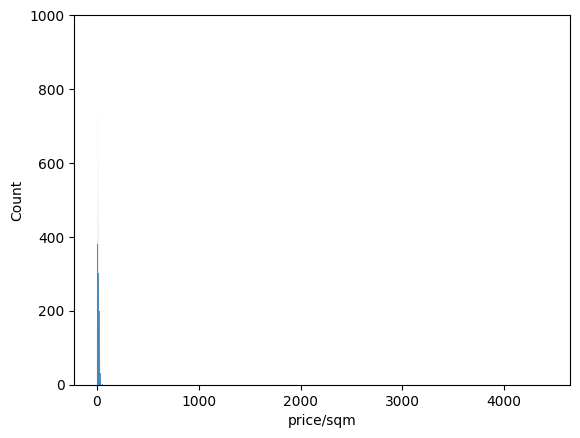

In [110]:
# Visualize the distribution of the target column
sns.histplot(data['price/sqm'])


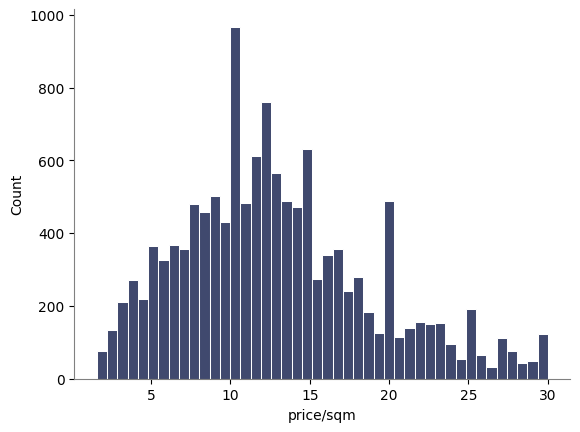

In [111]:
# Calculate the 2.5th and 97.5th percentiles of the 'price/sqm' column
lower_bound = data['price/sqm'].quantile(0.025)
upper_bound = data['price/sqm'].quantile(0.975)

# Keep only the data within these bounds
data = data[(data['price/sqm'] >= lower_bound) & (data['price/sqm'] <= upper_bound)]

# Visualize the distribution of the target column after removing outliers
sns.histplot(data['price/sqm'], color='#000C3D', edgecolor='white')

# Customize the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().xaxis.label.set_color('black') 
plt.gca().yaxis.label.set_color('black') 
plt.gca().tick_params(axis='x', colors='black')  
plt.gca().tick_params(axis='y', colors='black')  

plt.show()

In [112]:
# Checking numerical columns

data.describe()


,area,price/sqm
count,13015.000000,13015.000000
mean,388.463997,12.919738
std,552.393240,6.049118
min,100.000000,1.592857
25%,135.000000,8.666667
50%,200.000000,12.000000
75%,410.000000,16.363636
max,11500.000000,30.000000


In [113]:
# Group by the 'district' column and count the number of listings
listings_per_district = data.groupby('district').size().reset_index(name='count')
listings_per_district = listings_per_district.sort_values(by='count', ascending=False)

# Display the result
print(listings_per_district)

        district  count
8      Saburtalo   4213
10          Vake   2346
6     Mtatsminda   1679
2         Didube   1031
9        Samgori    808
1   Didi Dighomi    668
0      Chugureti    580
4          Isani    529
5      Krtsanisi    428
3         Gldani    386
7    Nadzaladevi    297
11   Vashlijvari     50


In [114]:
# Group by the 'type' column and count the number of listings
listings_per_district = data.groupby('type').size().reset_index(name='count')
listings_per_district = listings_per_district.sort_values(by='count', ascending=False)

# Display the result
print(listings_per_district)

         type  count
0  commercial   6267
1      office   5119
3   warehouse   1267
2    shopping    362


In [115]:
# Save the cleaned data
data.to_csv('SS_Final_cleaned.csv', index=False)